# Linear Regression: Cost of a Security Incident

#### This exercise explains the basic fundamentals of linear regression applied to a simple use case related to Cybersecurity.

## Excercise statement

#### The exercise consists of predicting the cost of a security incident based on the number of computers that have been affected. The data set is randomly generated.

## 1. Generating of the data set

In [17]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("The length of the data set is::", len(X))

The length of the data set is:: 100


## 2. Visualization of the data set

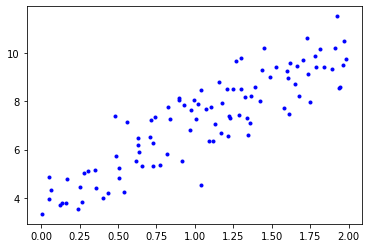

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, y, "b.")
plt.show()

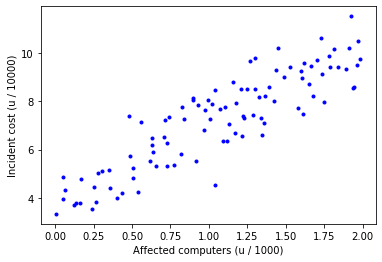

In [19]:
plt.plot (X, y, "b.") 
plt.xlabel("Affected computers (u / 1000)")
plt.ylabel ("Incident cost (u / 10000)") 
plt.show ()

## 3. Modification of the data set

In [20]:
import pandas as pd
data = {'n_equipos_affected': X.flatten(), 'cost': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_affected,cost
0,0.262907,3.827055
1,0.638732,5.903231
2,0.136075,3.793358
3,0.476858,7.397080
4,1.300340,9.799408
5,1.779152,9.883634
6,1.581823,7.743942
7,0.354015,4.410612
8,1.341381,7.323191
9,1.328722,8.199872


In [21]:
# Scaling the number of affected computers 
df['n_equipos_affected'] = df['n_equipos_affected'] * 1000
df['n_equipos_affected'] = df['n_equipos_affected'].astype('int')
# Escalado del coste
df['cost'] = df['cost'] * 10000
df['cost'] = df['cost'].astype('int')
df.head(10)

,n_equipos_affected,cost
0,262,38270
1,638,59032
2,136,37933
3,476,73970
4,1300,97994
5,1779,98836
6,1581,77439
7,354,44106
8,1341,73231
9,1328,81998


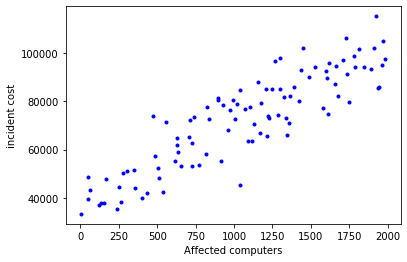

In [22]:
# Graphical representation of the data set
plt.plot(df['n_equipos_affected'], df['cost'], "b.")
plt.xlabel("Affected computers")
plt.ylabel("incident cost")
plt.show()

## 4. Construction of the model

In [23]:
from sklearn.linear_model import LinearRegression
# Construction of the model and adjustment of the hypothesis function
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_affected'].values.reshape(-1, 1), df['cost'].values)

LinearRegression()

In [24]:
# Parameter theta 0 and Parameter theta 1
lin_reg.intercept_,  lin_reg.coef_


(38952.55107784309, array([31.58177128]))

In [25]:
# training data point
X_min_max = np.array([[df["n_equipos_affected"].min()], [df["n_equipos_affected"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

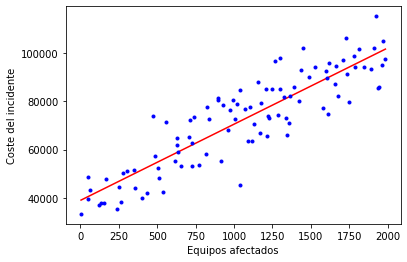

In [26]:
# Graphic representation of the hypothesis function generated
plt.plot(X_min_max, y_train_pred, "r-")
plt.plot(df['n_equipos_affected'], df['cost'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

## 5. Prediction of new examples

In [27]:
x_new = np.array([[1300]]) # 1300 affected computers 
# Prediction of the cost of the incident 
cost = lin_reg.predict(x_new)
print ("The cost of the incident would be:", int (cost [0]), "€")

The cost of the incident would be: 80008 €


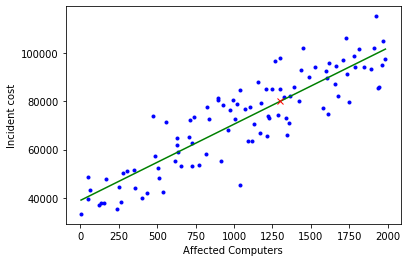

In [30]:
plt.plot(df ['n_equipos_affected'], df ['cost'], "b.") 
plt.plot(X_min_max, y_train_pred, "g-") 
plt.plot(x_new, cost, "rx") 
plt.xlabel("Affected Computers") 
plt.ylabel("Incident cost")
plt.show()